### APS1070 Project 1 --- Basic Principles and Models
**Deadline: May 24th, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Omar Al-Hilawani

Student ID: 1008735978

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [graduate admissions dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions). The dataset lists estimates of the chance of admission determined by several important parameters for a number of graduate school admissions decisions.


Download it using the cells below:

In [30]:
pip install wget

In [31]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/master/Admission_predict.csv')

'Admission_predict (7).csv'

## Part 1: Getting started [2.5 Marks]
First off, load the dataset in CSV file using Pandas and name it `df`. The dataset is called `Admission_predict.csv`. Reset the indices list of the DataFrame, and delete the `Serial No.` column. Print out the first few rows of the dataset, and take a look at the features data and the target columns. **[0.4]**

* How many features do we have in this dataset? ___
* Determine the median target value. ___
* How many individuals have a target value greater than the median target value? ___


Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the individuals with a chance of admission below median or the individuals with a chance of admission above median. **[0.5]**

In [32]:
import pandas as pd
#Reading the admission predict file into a pandas DataFrame called pd
df = pd.read_csv('Admission_predict.csv')
#Prints out the first few rows of the DataFrame
df.head()
#Rests the indices list
df.reset_index()
#Deletes the Serial No. column
df.drop("Serial No.", axis=1, inplace=True)
#Computes the median target value
median = df['target'].median()
#Prints out the median target value
print(median)
#Counts how many individuals have a target value greater than the median
x = (df["target"] > median).sum()
#Prints the number of individuals that have a target value greater than the median
print(x)
#Adds an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median)
df.insert(7, "New_Target", (df["target"] > median).astype(int))
#Drops the original target column
df = df.drop(columns=['target'])
#Returns the shape of the DataFrame
df.shape
#Prints out the first few rows of the DataFrame
df.head()

0.72
248


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,New_Target
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


We have 7 features in this dataset.
The median target value is 0.72.
There are 248 individuals that have a target value greater than the median target value.

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=xx``** where ``xx`` is the last two digits of your student number. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [33]:
#Import train test split library from sklearn
from sklearn.model_selection import train_test_split
target_data = df['New_Target']
feature_data = df.drop(columns=['New_Target'])

#This line splits the feature and target data
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=78, shuffle=True)

print(type(y_train))

y_train.head()

<class 'pandas.core.series.Series'>


247    0
384    1
436    0
14     0
70     1
Name: New_Target, dtype: int64

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the `GRE Score`, and the y-axis is the `CGPA`, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




     GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
247        311          104                  2  2.5  3.5  8.48         0   
384        340          113                  4  5.0  5.0  9.74         1   
436        310          110                  1  1.5  4.0  7.23         1   
14         311          104                  3  3.5  2.0  8.20         1   
70         332          118                  5  5.0  5.0  9.64         1   
..         ...          ...                ...  ...  ...   ...       ...   
105        316          110                  3  4.0  4.5  8.78         1   
40         308          110                  3  3.5  3.0  8.00         1   
407        298          100                  3  2.5  4.0  7.95         1   
470        320          110                  5  4.0  4.0  9.27         1   
197        310          106                  2  3.5  2.5  8.33         0   

     New_Target  
247           0  
384           1  
436           0  
14            0

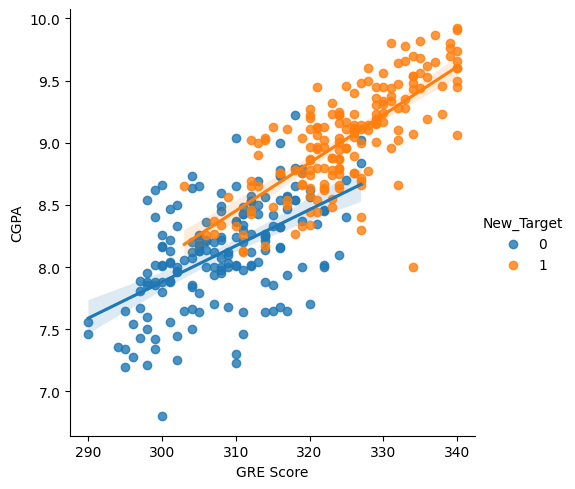

In [34]:
#Import sns from seaborn
import seaborn as sns

new_df = pd.concat([X_train,y_train], axis = 1)
print(new_df)
#Plotting GRE Score and CGPA before standardizing the data
sns.lmplot(new_df, x="GRE Score", y="CGPA", hue = "New_Target")


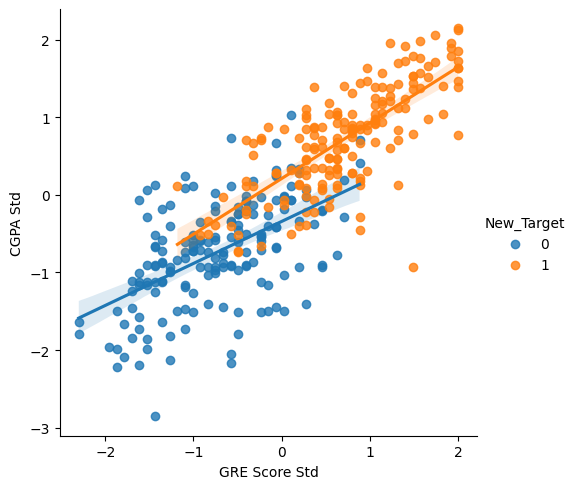

In [35]:
#Standardizing GRE Score data
new_df['GRE Score Std'] = ((new_df["GRE Score"] - new_df["GRE Score"].mean()) / new_df["GRE Score"].std())
#Standardizing CGPA data
new_df['CGPA Std'] = ((new_df["CGPA"] - new_df["CGPA"].mean()) / new_df["CGPA"].std())
#Plotting GRE Score and CGPA after standardizing the data
sns.lmplot(new_df, x="GRE Score Std", y="CGPA Std", hue = "New_Target")



The x-axis and y-axis values have changed, the mean is now zero, and the standard deviation is one.

Seaborn adjusts the axes limits to accommodate the range of the data which is why both graphs look the similar.

There are many advantages to standardization such as improving convergence, removing the effects of scaling, and stabalizing the algorithm. When standardizing the scales of all the features, the mean will become zero and the standard deviation will become 1. Performing this helps in ensuring that each feature contributes equally to the analysis and that no single feature overshadows others especially when different units are involved.

In [36]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
247,311,104,2,2.5,3.5,8.48,0
384,340,113,4,5.0,5.0,9.74,1
436,310,110,1,1.5,4.0,7.23,1
14,311,104,3,3.5,2.0,8.20,1
70,332,118,5,5.0,5.0,9.64,1


## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether an individual has a chance of admission that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**



n_neighbors = 1:, Mean Validation Accuracy = 0.8228571428571427
n_neighbors = 2:, Mean Validation Accuracy = 0.8342857142857143
n_neighbors = 3:, Mean Validation Accuracy = 0.8571428571428571
n_neighbors = 4:, Mean Validation Accuracy = 0.8485714285714285
n_neighbors = 5:, Mean Validation Accuracy = 0.8714285714285713
n_neighbors = 6:, Mean Validation Accuracy = 0.8628571428571428
n_neighbors = 7:, Mean Validation Accuracy = 0.8628571428571428
n_neighbors = 8:, Mean Validation Accuracy = 0.8571428571428571
n_neighbors = 9:, Mean Validation Accuracy = 0.8542857142857143
n_neighbors = 10:, Mean Validation Accuracy = 0.8542857142857143
n_neighbors = 11:, Mean Validation Accuracy = 0.8514285714285714
n_neighbors = 12:, Mean Validation Accuracy = 0.8428571428571429
n_neighbors = 13:, Mean Validation Accuracy = 0.8457142857142858
n_neighbors = 14:, Mean Validation Accuracy = 0.8542857142857143
n_neighbors = 15:, Mean Validation Accuracy = 0.8514285714285714
n_neighbors = 16:, Mean Validation

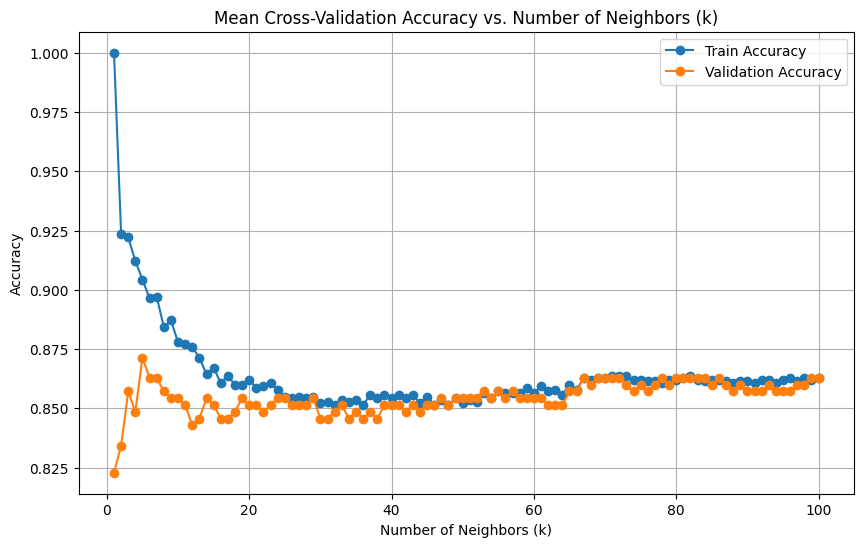

In [37]:
#Import neighbors from sklearn
from sklearn import neighbors
#Import cross validate from sklearn
from sklearn.model_selection import cross_validate
#Import plt from matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Range of n_neighbors
n_neighbors_range = range(1, 101)

# Lists to store the mean train and validation accuracies
train_accuracies = []
validation_accuracies = []

for k in n_neighbors_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)

    mean_train_accuracy = scores['train_score'].mean()
    mean_validation_accuracy = scores['test_score'].mean()

    train_accuracies.append(mean_train_accuracy)
    validation_accuracies.append(mean_validation_accuracy)

    #print(f'n_neighbors = {k}: Mean Train Accuracy = {mean_train_accuracy}, Mean Validation Accuracy = {mean_validation_accuracy}')
    print(f'n_neighbors = {k}:, Mean Validation Accuracy = {mean_validation_accuracy}')
#Prints the maximum validation accuracy after every loop
print(max(validation_accuracies))
#Prints the index at which the maximum validation accuracy is found
print(np.argmax(validation_accuracies)+1)

print(X_train)



# Plotting the results
#Creates a new 10 inches wide by 6 inches tall figure for plotting the data
plt.figure(figsize=(10, 6))
#Plots the n_neighbors_range vs. train_accuracies
plt.plot(n_neighbors_range, train_accuracies, label='Train Accuracy', marker='o')
#Plots the n_neighbors_range vs. validation_accuracies
plt.plot(n_neighbors_range, validation_accuracies, label='Validation Accuracy', marker='o')
#Sets the x-axis label
plt.xlabel("Number of Neighbors (k)")
#Sets the y-axis label
plt.ylabel("Accuracy")
#Sets the title
plt.title("Mean Cross-Validation Accuracy vs. Number of Neighbors (k)")
#Adds a legend
plt.legend()
#Adds a grid to the plot
plt.grid(True)
#Displays the plot
plt.show()




What is the best k? What is the highest cross-validation accuracy? [0.5]
Comment on which ranges of k lead to underfitted or overfitted models (hint: compare training and validation curves!)

The best k is 5. The highest cross-validation accuracy is 87.14%.

Underfitting occurs when both the training and validation accuracies are low which means the model is too simple to capture patterns in the data. When K equals 30, the training and validation accuracy is at around 0.85% which indicates that the model is not fitting the trained data well. Moreover, as k increases, the validation and training accuracy do not differ by much which is a clear sign of underfitting. The ranges of k that lead to underfitted models starts from around K = 25 to K = 101.

Overfitting happens when the training accuracy is high but the validation accuracy is low which means the model is capturing the noise of the training data and is too complex. When k is equal to 1, the training accuracy is 100% but the validation accuracy is 82.29%. This indicates the model is overfitting the data. The ranges of k that lead to overfitting models occur from K = 1 to K = 5.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


Feature: 0, Score: 0.60331
Feature: 1, Score: 0.07096
Feature: 2, Score: 0.02754
Feature: 3, Score: 0.02634
Feature: 4, Score: 0.03930
Feature: 5, Score: 0.20550
Feature: 6, Score: 0.02705
n_neighbors = 1:, Mean Validation Accuracy = 0.8228571428571427
n_neighbors = 2:, Mean Validation Accuracy = 0.8342857142857143
n_neighbors = 3:, Mean Validation Accuracy = 0.8571428571428571
n_neighbors = 4:, Mean Validation Accuracy = 0.8485714285714285
n_neighbors = 5:, Mean Validation Accuracy = 0.8714285714285713
n_neighbors = 6:, Mean Validation Accuracy = 0.8628571428571428
n_neighbors = 7:, Mean Validation Accuracy = 0.8628571428571428
n_neighbors = 8:, Mean Validation Accuracy = 0.8571428571428571
n_neighbors = 9:, Mean Validation Accuracy = 0.8542857142857143
n_neighbors = 10:, Mean Validation Accuracy = 0.8542857142857143
n_neighbors = 11:, Mean Validation Accuracy = 0.8514285714285714
n_neighbors = 12:, Mean Validation Accuracy = 0.8428571428571429
n_neighbors = 13:, Mean Validation Accur

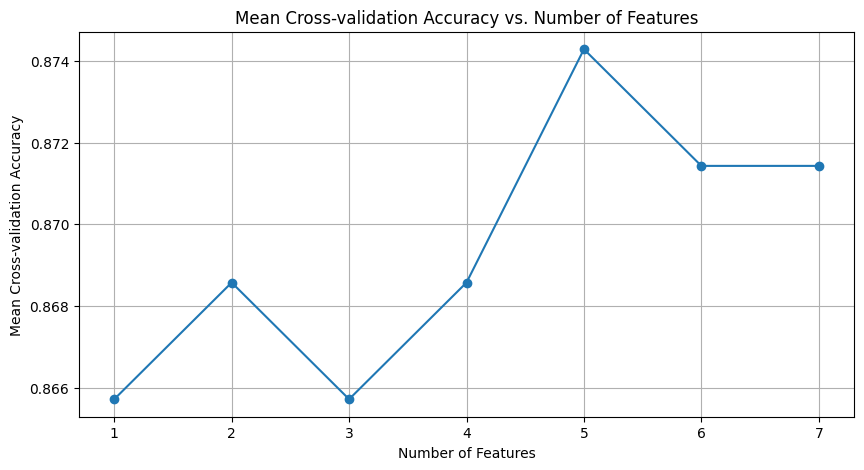

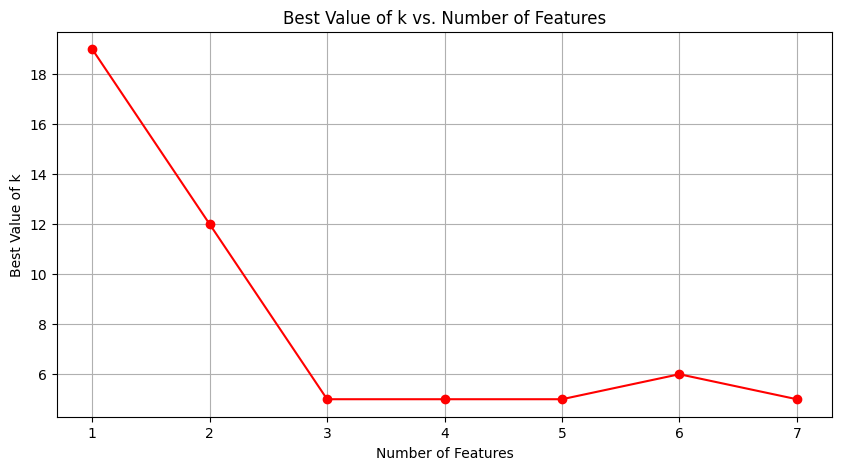

In [38]:
#Import tree from sklearn
from sklearn import tree
#Import np from numpy
import numpy as np
#Import plt from matplotlib
import matplotlib.pyplot as plt


max_validation_accuracies = []
k_associated_with_max_validation_accuracy = []
num_features_list = []

def Feature_selector (X_train , y_train , tr=0.95):

  while X_train.shape[1]>=1:
    score = []
    features = []

    dt = tree.DecisionTreeClassifier(random_state= 78)
    dt.fit(X_train,y_train)
    importance = dt.feature_importances_
    X_train = pd.DataFrame(X_train)
    num_features_list.append(X_train.shape[1])
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
      score.append(v)
      features.append(i)

    train_accuracies = []
    validation_accuracies = []
    for k in n_neighbors_range:
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      scores = cross_validate(knn, X_train, y_train, cv=5, return_train_score=True)

      mean_train_accuracy = scores['train_score'].mean()
      mean_validation_accuracy = scores['test_score'].mean()


      train_accuracies.append(mean_train_accuracy)
      validation_accuracies.append(mean_validation_accuracy)
      print(f'n_neighbors = {k}:, Mean Validation Accuracy = {mean_validation_accuracy}')

    print("Validation Accuracy:",max(validation_accuracies))
    #print(np.argmax(validation_accuracies)+1)
    print("Index # of the max val acc:",np.argmax(validation_accuracies)+1)
    max_validation_accuracies.append(max(validation_accuracies))
    k_associated_with_max_validation_accuracy.append(np.argmax(validation_accuracies)+1)
    print("Validation Accuracies:",max(validation_accuracies))
    print("Maximum Validation Accuracies After Every Loop:",max_validation_accuracies)
      #print(f'n_neighbors = {k}: Mean Train Accuracy = {mean_train_accuracy}, Mean Validation Accuracy = {mean_validation_accuracy}')
    print('\n')



    if X_train.shape[1] == 1:
        print("Condition 1: X_train has only 1 feature")
        break
    elif max(validation_accuracies) < 0.95 * 0.8714285714285713:
        print("Condition 2: Max validation accuracy of current iteration is less than 95% of max validation accuracy of previous iterations")
        break

    X_train = X_train.drop(X_train.columns[score.index(min(score))], axis = 1)


  # Plot mean cross-validation accuracy vs. number of features
  #Creates a new 10 inches wide by 5 inches tall figure for plotting the data
  plt.figure(figsize=(10, 5))
  #Plots the mean cross-validation accuracy vs. number of features
  plt.plot(num_features_list, max_validation_accuracies, marker='o')
  #Sets the x-axis label
  plt.xlabel('Number of Features')
  #Sets the y-axis label
  plt.ylabel('Mean Cross-validation Accuracy')
  #Sets the title
  plt.title('Mean Cross-validation Accuracy vs. Number of Features')
  #Adds a grid to the plot
  plt.grid(True)
  #Displays the plot
  plt.show()
  # Plot best value of k vs. number of features
  plt.figure(figsize=(10, 5))
  plt.plot(num_features_list, k_associated_with_max_validation_accuracy, marker='o', color='r')
  #Sets the x-axis label
  plt.xlabel('Number of Features')
  #Sets the y-axis label
  plt.ylabel('Best Value of k')
  #Sets the title
  plt.title('Best Value of k vs. Number of Features')
  #Adds a grid to the plot
  plt.grid(True)
  #Displays the plot
  plt.show()

  return

Feature_selector (X_train , y_train)

The number of essential features for classification is 5. As shown in the Mean Cross-validation Accuracy vs. Number of Features graph, as more features are added, the accuracy keeps on increasing. Having 5 features provided us with the highest mean cross-validation accuracy.

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


Feature: 0, Score: 0.60331
Feature: 1, Score: 0.07096
Feature: 2, Score: 0.02754
Feature: 3, Score: 0.02634
Feature: 4, Score: 0.03930
Feature: 5, Score: 0.20550
Feature: 6, Score: 0.02705
n_neighbors = 1:, Mean Validation Accuracy = 0.8457142857142855
n_neighbors = 2:, Mean Validation Accuracy = 0.8542857142857143
n_neighbors = 3:, Mean Validation Accuracy = 0.8685714285714287
n_neighbors = 4:, Mean Validation Accuracy = 0.8714285714285713
n_neighbors = 5:, Mean Validation Accuracy = 0.877142857142857
n_neighbors = 6:, Mean Validation Accuracy = 0.8799999999999999
n_neighbors = 7:, Mean Validation Accuracy = 0.8742857142857142
n_neighbors = 8:, Mean Validation Accuracy = 0.8828571428571428
n_neighbors = 9:, Mean Validation Accuracy = 0.8828571428571428
n_neighbors = 10:, Mean Validation Accuracy = 0.8914285714285712
n_neighbors = 11:, Mean Validation Accuracy = 0.8971428571428571
n_neighbors = 12:, Mean Validation Accuracy = 0.9028571428571428
n_neighbors = 13:, Mean Validation Accura

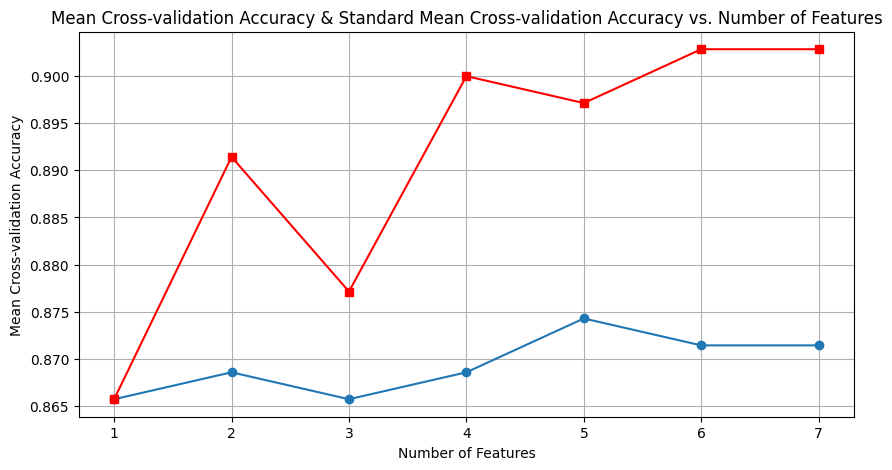

In [41]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_scaled


max_validation_accuracies_1 = []
num_features_list_1 = []

def Feature_selector (X_scaled , y_train , tr=0.95):
  dt = tree.DecisionTreeClassifier(random_state= 78)
  dt.fit(X_scaled,y_train)
  importance = dt.feature_importances_
  #importance_1 = pd.DataFrame(importance)
  X_scaled = pd.DataFrame(X_scaled)


  while X_scaled.shape[1]>=1:
    score = []
    features = []

    dt = tree.DecisionTreeClassifier(random_state= 78)
    dt.fit(X_scaled,y_train)
    importance = dt.feature_importances_
    #importance_1 = pd.DataFrame(importance)
    X_scaled = pd.DataFrame(X_scaled)
    num_features_list_1.append(X_scaled.shape[1])
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
      score.append(v)
      features.append(i)

    train_accuracies = []
    validation_accuracies = []
    for k in n_neighbors_range:
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      scores = cross_validate(knn, X_scaled, y_train, cv=5, return_train_score=True)

      mean_train_accuracy = scores['train_score'].mean()
      mean_validation_accuracy = scores['test_score'].mean()


      train_accuracies.append(mean_train_accuracy)
      validation_accuracies.append(mean_validation_accuracy)
      print(f'n_neighbors = {k}:, Mean Validation Accuracy = {mean_validation_accuracy}')

    print("Validation Accuracy:",max(validation_accuracies))
    #Prints the index of the max validation accuracy
    print("Index # of the max val acc:",np.argmax(validation_accuracies)+1)
    max_validation_accuracies_1.append(max(validation_accuracies))

    print("Maximum Validation Accuracies After Every Loop:",max_validation_accuracies_1)

    if X_scaled.shape[1] == 1:
        print("Condition 1: X_train has only 1 feature")
        break
    elif max(validation_accuracies) < 0.95 * 0.8714285714285713:
        print("Condition 2: Max validation accuracy of current iteration is less than 95% of max validation accuracy of previous iterations")
        break

    X_scaled = X_scaled.drop(X_scaled.columns[score.index(min(score))], axis = 1)
  # Plot mean cross-validation accuracy vs. number of features
  #Creates a new 10 inches wide by 5 inches tall figure for plotting the data
  plt.figure(figsize=(10, 5))
  #Plots the mean cross-validation accuracy vs. number of features
  plt.plot(num_features_list, max_validation_accuracies, marker='o')
  #Plots the standardized mean cross-validation accuracy vs. number of features
  plt.plot(num_features_list_1, max_validation_accuracies_1, marker='s', color='r')
  #Sets the x-axis label
  plt.xlabel('Number of Features')
  #Sets the y-axis label
  plt.ylabel('Mean Cross-validation Accuracy')
  #Sets the title
  plt.title('Mean Cross-validation Accuracy & Standard Mean Cross-validation Accuracy vs. Number of Features')
  #Adds a grid to the plot
  plt.grid(True)
  #Displays the plot
  plt.show()

  return


Feature_selector (X_scaled , y_train)

Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)

Standardization helped my model and its performance as shown in the plot above. Since KNN is dependent upon distance to find the nearest neighbor of data point, some features with larger ranges might dominate the calculation distance which in-turn makes the model baised towards those features. This is why by standardizing the data which means the features have a mean of zero and a standard deviation of one, ensures that every single feature contributes equally to the distance calculation which leads to a more balanced and accurate accessment. Additionally, by standardizing the data, the model is able to use all available features effectively to enable it to find the nearest neighbors. Moreover, standardizing the data enables the model to perform more predictibly and consistently and reduces the impact of outliers.

The first highest cross validation which was 90.28% was obtained when their were 6 features. They are GRE Score, TOEFL Score, University Rating, LOR, CGPA, and Research. SOP was dropped. K value is 6.

The second highest cross validation which was 90% was obtained when their were 4 features. They are GRE Score, TOEFL Score, University Rating, and CGPA. SOP, Research, and LOR were dropped. K value is 27.

The third highest cross validation which was 89.7% was obtained when their were 5 features. They are GRE Score, TOEFL Score, University Rating, LOR and CGPA. SOP and Research were dropped. K value is 24.

The fourth highest cross validation which was 89.1% was obtained when their were 2 features. They are GRE Score and CGPA. SOP, Research, LOR, University Rating, and TOEFL Score were dropped. K value is 21.

The fifth highest cross validation which was 87.7% was obtained when their were 3 features. They are GRE Score, TOEFL Score, and CGPA. SOP, Research, LOR, and University Rating were dropped. K value is 9.

The sixth highest cross validation which was 86.5% was obtained when their was 1 feature. It is the GRE Score. SOP, Research, LOR, University Rating, and TOEFL Score, and CGPA were dropped. K value is 9.



## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [42]:
#A list to store all the training accuracies values
train_accuracies = []
#A list to store all the validation accuracies values
validation_accuracies = []

#Performs a loop ranging from 1 to 20 for the max depth parameter
for max_depth in range(1,20):
  #Performs a loop ranging from 2 to 20 for the min samples split parameter
  for min_samples_split in range(2,20):
    #This line initializes the decision tree
    dt = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state= 78)
    #This line fits the decision tree to the target and scaled test data
    dt.fit(X_scaled,y_train)

    #Performing cross validation using the cross validate function
    scores = cross_validate(dt, X_scaled, y_train, cv=5, return_train_score=True)
    #Calculating the mean training accuracy for all cross validation folds. Then the mean is calculated for the training scores  obtained for each fold.
    mean_train_accuracy = scores['train_score'].mean()
    #Calculating the mean validation accuracy for all cross validation folds. Then the mean is calculated for the test scores  obtained for each fold.
    mean_validation_accuracy = scores['test_score'].mean()
    #Appends every new mean train accuracy value
    train_accuracies.append(mean_train_accuracy)
    #Appends every new validation accuracy value
    validation_accuracies.append(mean_validation_accuracy)
#Printing the maximum validation accuracy
print("Max Validation Accuracy:",max(validation_accuracies))


Max Validation Accuracy: 0.8628571428571428


As shown in the output above, the maximum mean cv score when a decision tree classifier is trained on the standardized dataset with a tuned max depth ranging from 1 - 20 and a min sample split ranging from 2 - 20 is 86.28%. It is close to 90.28% which was acheived by the KNN model that was trained on the standardized dataset.

## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [43]:
#Imported Accuracy Score
from sklearn.metrics import accuracy_score
#This transforms the test set with the scalr that we originally fit the standardscaler on the training set
X_scaled_1 = scaler.transform(X_test)

#This line fits the KNN to the target and scaled data
knn.fit(X_scaled_1, y_test)
#Performs the accuracy calculation
accuracy = accuracy_score(y_test, knn.predict(X_scaled_1))
#Prints out the test set accuracy
print ("Test set accuracy: ", accuracy * 100, "%")

Test set accuracy:  83.33333333333334 %


The best model that provided the highest CV accuracy was KNN. The test accuracy that was achieved when applying KNN was 83.33%. The best training accuracy that was achieved using KNN was 90.28% which is higher than the test accuracy. The drop in accuracy could be related to several reasons such as the model overfitting on the training data, the test set containing some noise, or there was a sizable shift in the training and test data. Additional investigation is required to closely examine what might have caused the drop in accuracy.


\References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/